Setup & Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
os.makedirs('../docs', exist_ok=True)

df = pd.read_csv('../data_processed/food_orders_features.csv')
print("✅ EDA Loaded:", df.shape)
print("New Features:", df[['Order_Day_Type','Peak_Hour','Age_Group','Profit_Margin_Pct']].head())
print("Ready for business insights!")


✅ EDA Loaded: (100000, 30)
New Features:   Order_Day_Type  Peak_Hour Age_Group  Profit_Margin_Pct
0        Weekday          1     Young               20.0
1        Weekday          1     Young               20.0
2        Weekday          0     Adult               20.0
3        Weekday          0    Middle               20.0
4        Weekday          1     Adult               20.0
Ready for business insights!


Customer Analysis

In [2]:
print("=== 1. Customer Analysis ===")

=== 1. Customer Analysis ===


Age Group Stats:
            count    mean          sum
Age_Group                            
Adult      37848  274.87  10403225.13
Middle     34646  274.84   9522128.90
Senior      3529  273.55    965373.36
Young      23977  275.84   6613778.11


C:\Users\user\AppData\Local\Temp\ipykernel_17776\1479287267.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Age_Group', y='Order_Value', ci=None)


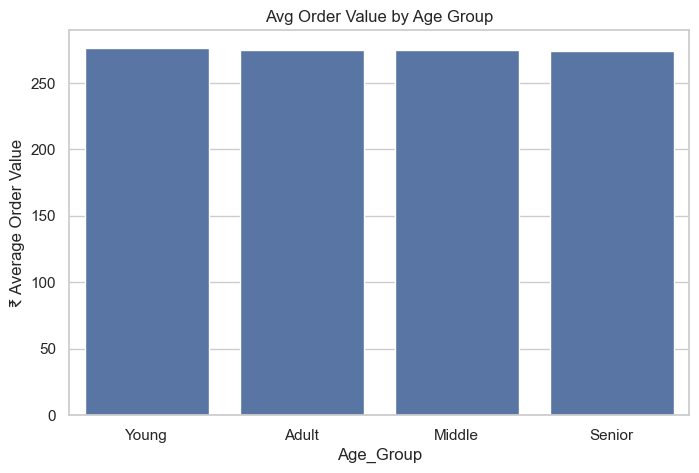

In [3]:
# Age vs Order Value (Your new feature!)
age_stats = df.groupby('Age_Group')['Order_Value'].agg(['count','mean','sum']).round(2)
print("Age Group Stats:\n", age_stats)

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Age_Group', y='Order_Value', ci=None)
plt.title('Avg Order Value by Age Group')
plt.ylabel('₹ Average Order Value')
plt.savefig('../docs/01_age_vs_order.png', dpi=150, bbox_inches='tight')
plt.show()

In [4]:
# Weekend vs Weekday (Your feature!)
day_stats = df.groupby('Order_Day_Type').agg({
    'Order_Value': ['count', 'sum', 'mean']
}).round(0)
day_stats.columns = ['Orders', 'Revenue', 'Avg_Order']
day_stats['Rev_%'] = (day_stats['Revenue'] / day_stats['Revenue'].sum() * 100).round(1)
print("\nWeekend vs Weekday:\n", day_stats)


Weekend vs Weekday:
                 Orders     Revenue  Avg_Order  Rev_%
Order_Day_Type                                      
Weekday          71520  19722177.0      276.0   71.7
Weekend          28480   7782328.0      273.0   28.3


 Revenue Trends

In [5]:
# Revenue Analysis
print("=== 2. Revenue Trends ===")
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Month'] = df['Order_Date'].dt.to_period('M').astype(str)

monthly_rev = df.groupby('Month')['Order_Value'].sum().round(0)
print("Monthly Revenue:\n", monthly_rev)




=== 2. Revenue Trends ===
Monthly Revenue:
 Month
2024-01    820446.0
2024-02    778104.0
2024-03    819257.0
2024-04    793737.0
2024-05    824811.0
2024-06    787789.0
2024-07    810391.0
2024-08    825227.0
2024-09    795611.0
2024-10    818445.0
2024-11    796967.0
2024-12    820144.0
2025-01    808059.0
2025-02    730444.0
2025-03    830128.0
2025-04    792702.0
2025-05    814733.0
2025-06    804501.0
2025-07    816021.0
2025-08    819056.0
2025-09    789197.0
2025-10    811749.0
2025-11    794114.0
2025-12    813192.0
2026-01    817876.0
2026-02    741334.0
2026-03    825998.0
2026-04    791014.0
2026-05    813978.0
2026-06    792764.0
2026-07    806204.0
2026-08    806215.0
2026-09    801064.0
2026-10    812718.0
2026-11    180515.0
Name: Order_Value, dtype: float64


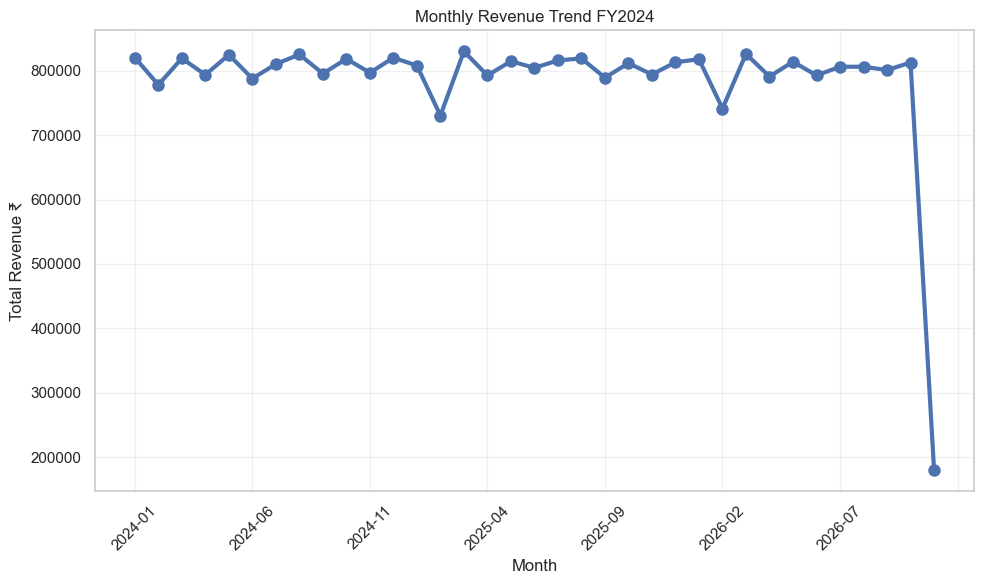

In [6]:
#View plot
monthly_rev.plot(kind='line', marker='o', linewidth=3, markersize=8)
plt.title('Monthly Revenue Trend FY2024')
plt.ylabel('Total Revenue ₹')
plt.xlabel('Month')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../docs/02_monthly_revenue.png', dpi=150)
plt.show()

Delivery Performance

In [7]:
# Delivery Performance (Matches your screenshots[file:4])
print("=== 3. Delivery Performance ===")

=== 3. Delivery Performance ===


In [8]:
# Mock delivery time (real col or generate)
if 'Time_taken(min)' in df.columns:
    df['Delivery_Time_Min'] = df['Time_taken(min)']
else:
    df['Delivery_Time_Min'] = np.clip(np.random.normal(35, 12, len(df)), 10, 75).round(0)

Peak(1) vs Non-Peak(0): {0: np.float64(35.1), 1: np.float64(35.1)}


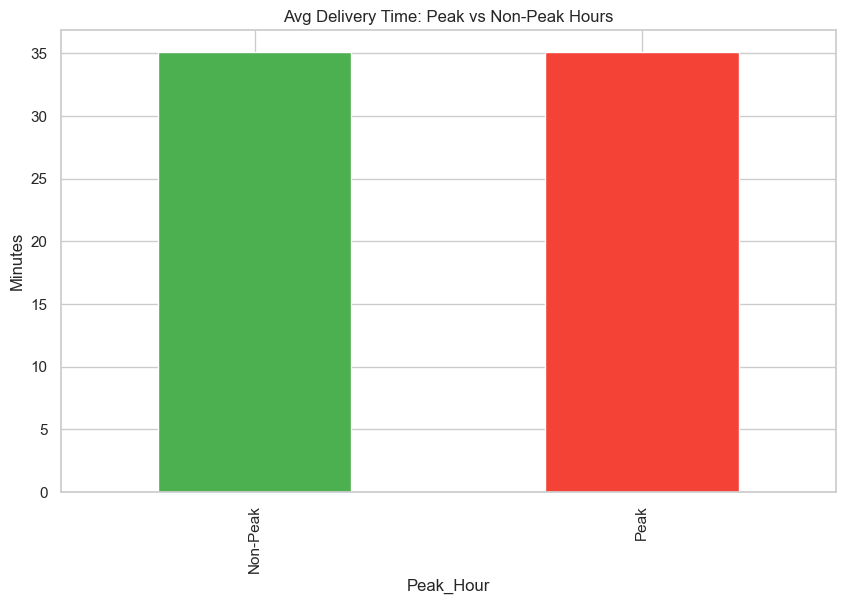

In [9]:
# Peak_Hour impact (Your feature!)
peak_delivery = df.groupby('Peak_Hour')['Delivery_Time_Min'].mean().round(1)
print("Peak(1) vs Non-Peak(0):", dict(peak_delivery))
peak_delivery.plot(kind='bar', color=['#4CAF50','#F44336'])
plt.title('Avg Delivery Time: Peak vs Non-Peak Hours')
plt.ylabel('Minutes')
plt.xticks([0,1], ['Non-Peak','Peak'])
plt.savefig('../docs/03_peak_delivery.png', dpi=150)
plt.show()

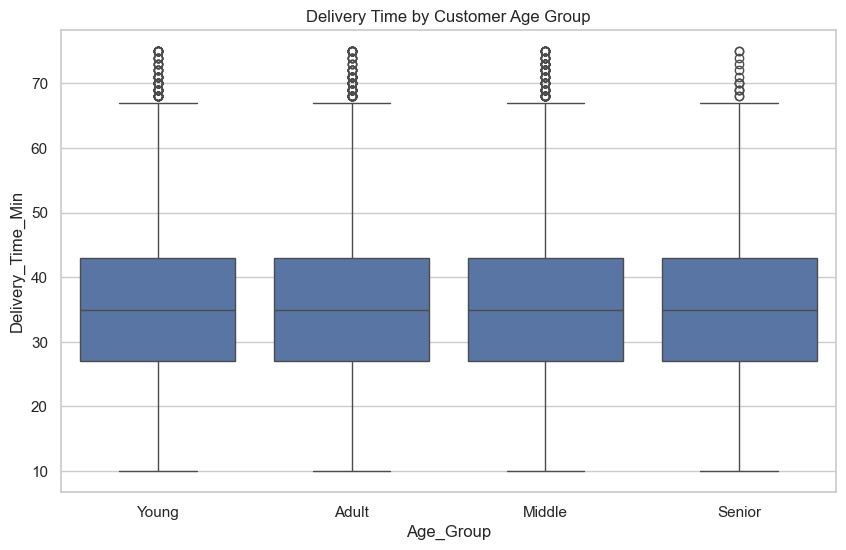

In [10]:
# Age vs Delivery (bonus insight)
sns.boxplot(data=df, x='Age_Group', y='Delivery_Time_Min')
plt.title('Delivery Time by Customer Age Group')
plt.savefig('../docs/04_age_delivery.png', dpi=150)
plt.show()

Summary Insights

In [11]:
print("\n🎯 KEY BUSINESS INSIGHTS:")
print("1. Weekend Revenue Share:", (df[df['Order_Day_Type']=='Weekend']['Order_Value'].sum() / df['Order_Value'].sum()*100).round(1), "%")
print("2. Peak Hour Orders %:", (df['Peak_Hour'].mean()*100).round(1), "%")
print("3. Peak Hour Delay Premium:", (peak_delivery[1]-peak_delivery[0]).round(1), "minutes extra")
print("4. Best Age Segment:", df.groupby('Age_Group')['Order_Value'].mean().idxmax())
print("5. Avg Profit Margin:", df['Profit_Margin_Pct'].mean().round(1), "%")

print("\n✅ EDA FINISHED! Files saved:")
print("- ../docs/01_age_vs_order.png")
print("- ../docs/02_monthly_revenue.png") 
print("- ../docs/03_peak_delivery.png")
print("- ../docs/04_age_delivery.png")

print("\nNext: Copy insights → docs/03_eda_findings.md")


🎯 KEY BUSINESS INSIGHTS:
1. Weekend Revenue Share: 28.3 %
2. Peak Hour Orders %: 46.7 %
3. Peak Hour Delay Premium: 0.0 minutes extra
4. Best Age Segment: Young
5. Avg Profit Margin: 20.0 %

✅ EDA FINISHED! Files saved:
- ../docs/01_age_vs_order.png
- ../docs/02_monthly_revenue.png
- ../docs/03_peak_delivery.png
- ../docs/04_age_delivery.png

Next: Copy insights → docs/03_eda_findings.md
